In [1]:
#load modules and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
%matplotlib inline

Instructions for updating:
non-resource variables are not supported in the long term


In [2]:
#load the data
data = pd.read_csv('Admission_Predict.csv')

In [3]:
#display data
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [28]:
#define function to train model
def train_(columns, epochs):
    
    
    #declare scaler object
    scaler = StandardScaler()
    
    
    #normalise X and Y data
    x_data = scaler.fit_transform(data[columns])
    y_data = data.iloc[:,8]
    
    
    #start tf session
    sess = tf.Session()
    
    
    #declare placeholders for x and y. The data is fed into the placeholders
    num_features = len(columns)
    x = tf.placeholder(dtype=float, shape=(None, num_features))
    y = tf.placeholder(dtype=float)
    
    
    #declare variables W and B. We minimize cost function to estimate these variables
    W = tf.Variable([tf.random_normal(shape=[num_features,1])])
    B = tf.Variable(0.05)
    
    
    #perform matrix multiplication and predicted y
    xW = tf.matmul(x, W)
    ymodel = tf.add(xW, B)
    
    
    #calculate error aka loss function
    error = tf.reduce_sum(tf.square(y-ymodel))
    
    
    #define optimizer. In this case gradient descent
    optimizer = tf.train.GradientDescentOptimizer(0.00001)
    train = optimizer.minimize(error)
    
    
    #initialize variables
    init = tf.global_variables_initializer()  
    sess.run(init)
    
    
    training_epochs = epochs
    cost = []
    epoch_n = []
    
    plt.figure(figsize=(10,10))
    
    
    #iterate through each epoch
    for epoch in range(training_epochs): 
        
        #feed each training example to the optimizer
        for (_x, _y) in zip(x_data, y_data): 
            sess.run(train, feed_dict = {x : _x.reshape(1,num_features), y : _y}) 
          
        #for every 10th epoch, print the loss
        if (epoch + 1) % 10 == 0: 
            c = sess.run(error, feed_dict = {x : x_data, y : y_data}) 
            cost.append(c/x_data.shape[0])
            epoch_n.append(epoch+1)
            plt.plot(epoch_n, cost, 'r')
            plt.xlabel('epoch')
            plt.ylabel('loss')
            plt.savefig('convergence')
            print("Epoch", (epoch + 1), ": cost =", c/x_data.shape[0], "W =", sess.run(W), "b =", sess.run(B)) 
      
    
    #save the calculated weights and biases
    weight = sess.run(W) 
    bias = sess.run(B)
    y_data = data.iloc[:, 8]
    
    return y_data, x_data, weight, bias


#define function to predict on X
def predict(x, w, b):
    predictions = np.dot(x,w) +b
    return predictions

Epoch 10 : cost = 317.67875 W = [[[0.62161523]]] b = 0.1018512
Epoch 20 : cost = 275.969921875 W = [[[0.5826094]]] b = 0.14971583
Epoch 30 : cost = 240.1765625 W = [[[0.54660606]]] b = 0.19390057
Epoch 40 : cost = 209.4419921875 W = [[[0.51337]]] b = 0.23468713
Epoch 50 : cost = 183.035703125 W = [[[0.48268867]]] b = 0.2723386
Epoch 60 : cost = 160.33474609375 W = [[[0.4543661]]] b = 0.30709502
Epoch 70 : cost = 140.80642578125 W = [[[0.42822096]]] b = 0.33917955
Epoch 80 : cost = 123.99568359375 W = [[[0.4040851]]] b = 0.3687971
Epoch 90 : cost = 109.5144140625 W = [[[0.38180643]]] b = 0.39613768
Epoch 100 : cost = 97.0301171875 W = [[[0.36124137]]] b = 0.4213758
Epoch 110 : cost = 86.257705078125 W = [[[0.3422553]]] b = 0.44467345
Epoch 120 : cost = 76.95537109375 W = [[[0.32472998]]] b = 0.46617892
Epoch 130 : cost = 68.914599609375 W = [[[0.30855224]]] b = 0.48603204
Epoch 140 : cost = 61.9577099609375 W = [[[0.2936184]]] b = 0.50435925
Epoch 150 : cost = 55.9328564453125 W = [[[0.

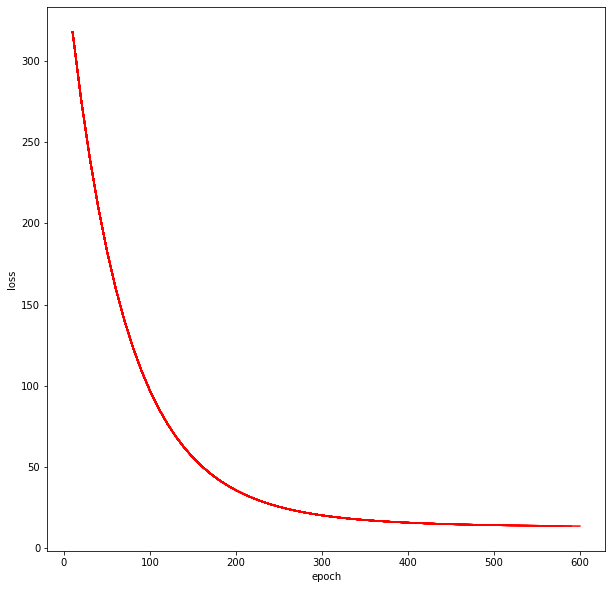

In [29]:
y, x_data, w, b = train_(columns=['GRE Score'], epochs=600)

In [10]:
y_hat = predict(x_data, w, b)

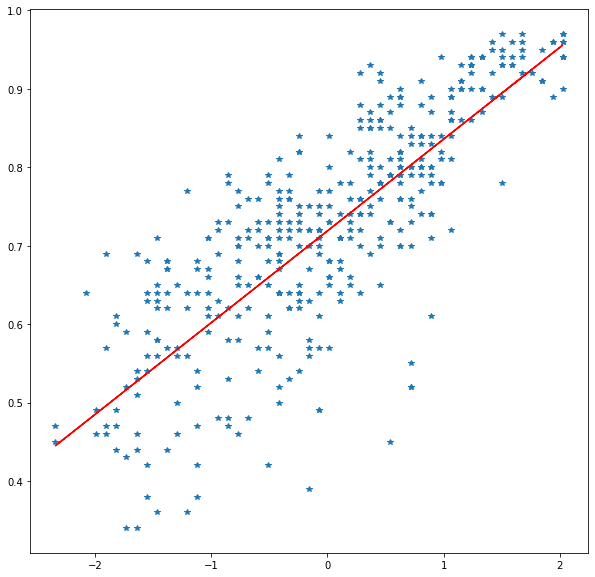

In [30]:
plt.figure(figsize = (10,10))
plt.plot(x_data[:,0], data.iloc[:, 8], '*')
plt.plot(x_data[:,0], y_hat[:,:,0], 'r')
plt.savefig('predictions')